<html>
<div>
  <span style="font-family: Poppins; font-size:30px; color: white;"> <br/> University of Tehran <br/> CA6
</div>
<span style="font-family: Poppins; font-size:15pt; color: white; vertical-align: middle;"> Mahdi Noori </span><br>
<span style="font-family: Poppins; font-size:15pt; color: white; vertical-align: middle;"> 810100231 </span>

</html>

## Goal
In this notebook we learn clustring and how to use it label different news provided in the dataset. News clustering is a technique widely used in different search browser.

## Problem Description
In this problem we are given several news headlines which has been categorized and labeled based on the type of message they convey. Using this dataset we are to train a clustering model to predict based on the headlines to which category it belongs. 

### Imports

In [1]:
import pandas as pd
import hazm as hz
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.preprocessing import LabelEncoder
from helper import plot_cluster, dbscan_gridsearch

### Consts

In [2]:
TRAIN_CSV = "./dataset/train.csv"
Test_CSV = "./dataset/test.csv"

## Data Analysis

First we inspect the data format in ```train_df``` using ```head()``` function. 

In [3]:
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(Test_CSV)
train_df.head(10)

,label,content
0,فناوری,گزارش های منتشر شده حاکی از آن است که کاربران ...
1,ورزشی,سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2,حوادث,مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3,فناوری,یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4,سلامت,دانشمندان در جدیدترین مطالعات خود اثرات جدید و...
5,سلامت,مصرف میوه، یکی از راه های سالم برای کاهش وزن س...
6,سیاسی,رئیس جمهوری پیش‌بینی، پیشگیری و درمان آسیب‌های...
7,ورزشی,پرسپولیس با برتری ۲ بر صفر مقابل تراکتور، اختل...
8,ورزشی,مدیرعامل باشگاه استقلال گفت: برای گرفتن مجوز ح...
9,سیاسی,دبیرکل حزب اسلامی ایران زمین در واپسین دقایق م...


In [4]:
test_df.head(10)

,label,content
0,فناوری,بعد از اعلام لیست ۲۳ شرکت مجاز ثبت سفارش و ارا...
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم، گفت: ریشه موسیقی...
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...
3,فناوری,استفاده از سرویس‌های iMassage یا Facetime محصو...
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت: 10 میلیون دل...
5,حوادث,مردی که یک‌ بار از اتهام قتل تبرئه شده بود، بع...
6,فناوری,شرایط کنونی بازار گوشی هوشمند به گونه‌ای پیش ر...
7,ورزشی,شایسته است در چنین وضعیتی، استاندار مازندران و...
8,فناوری,بسیاری از کاربران همیشه به دنبال گوشی میان‌رده...
9,فرهنگی/هنری,نشریه ورایتی در گزارشی درباره پیش‌بینی خود از ...


Now we inspect the main description of the dataset using `describe()` function and each labels sample count.

In [5]:
train_df.describe()

,label,content
count,9000,9000
unique,6,8980
top,فناوری,منبع: ایسنا
freq,1500,4


In [6]:
test_df.describe()

,label,content
count,1115,1115
unique,6,1113
top,حوادث,عصرخبر
freq,200,3


In [7]:
print("Distribution of data in train data is :")
for key,val in dict(train_df['label'].value_counts()).items():
    print(f"{key}      {val}")

print("--------------------------")

print(f"Distribution of data in test data is :")
for key,val in dict(test_df['label'].value_counts()).items():
    print(f"{key}      {val}")

Distribution of data in train data is :
فناوری      1500
ورزشی      1500
حوادث      1500
سلامت      1500
سیاسی      1500
فرهنگی/هنری      1500
--------------------------
Distribution of data in test data is :
حوادث      200
سیاسی      200
ورزشی      190
فرهنگی/هنری      180
سلامت      177
فناوری      168


As we can see above the distribution of data in `train_dataset` for each label is equal.

### Q1.
This problem is referred to as a class imbalance problem. This can lead to issues in machine learning models as they are often designed to optimize for overall accuracy, which can result in the model being biased towards the majority class.

Here are some methods to handle this issue:

1. `Resampling:` This involves balancing the number of majority and minority instances in the training data. This can be done by either oversampling the minority class, undersampling the majority class.

2. `Cost-Sensitive Learning:` This approach assigns a higher misclassification cost to the minority class. The idea is to make the model pay more attention to the minority class during the learning process.

3. `Data-level and Hybrid Methods:` These methods involve manipulating the data to create a more balanced dataset.

4. `Class Decomposition:` This method involves detecting and removing negative instances from the overlapping region using neighborhood searching techniques.


## Preprocessing

## Q2.

1. `Normalization:` This is a preprocessing step to transform all the data into a standard format. It often involves converting all text to lowercase and removing punctuation or special characters. In the context of word clustering, normalization can also involve transforming all the words into a numerical vector format.

2. `Lemmatization:` This is the process of reducing inflected words to their base or dictionary form. For example, "running" becomes "run", "better" becomes "good". The base form is known as the lemma.

3. `Stemming:` This is the process of reducing inflected (or sometimes derived) words to their stem, base or root form. The main difference between stemming and lemmatization is that stemming can often create non-existent words, whereas lemmas are actual words. For example, "running" becomes "run", "multiplication" becomes "multipli". So, stemming may be more crude than lemmatization.

So as you can see above all these three methods will make a good contribution to the performance.

Now here we wrote `normalize` function which gets a text and after performing the methods above it returns the result.

The normalize function aims to enhance the quality of our textual data. It consists of 3 steps:

- ```Normalization```: Utilizing a custom normalizer, each document undergoes a normalization process to ensure consistent formatting and reduce noise.

- ```Tokenization```: The normalized text is then tokenized using the Hazm library's word_tokenize function, breaking it down into individual words.

- ```Lemmatization and Stemming```: Each token undergoes lemmatization and stemming processes. Lemmatization aims to reduce words to their base or root form, while stemming further simplifies words by removing prefixes or suffixes. These steps contribute to a more focused and concise representation of the text.

In [106]:
normalizer = hz.Normalizer()
lemmatizer = hz.Lemmatizer()
stemmer = hz.Stemmer()

def normalize(text):
    
    normalized_text = normalizer.normalize(text)
    
    tokens = hz.word_tokenize(normalized_text)
    

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

In [107]:
train_df['processed_text'] = train_df['content'].apply(normalize)
test_df['processed_text'] = test_df['content'].apply(normalize)

## Train

### Q3.
Feature vectors are used in text clustering problems for several reasons:

1. `Representation:` Feature vectors provide a numerical representation of text data, which is essential for machine learning algorithms.

2. `Dimensionality:` They help in dealing with the high-dimensional nature of text data. Each dimension in the feature vector can represent a different feature of the input data.

3. `Sparsity:` Text data is often sparse (many zero values), and feature vectors can efficiently represent this sparsity.

4. `Generalization:` Feature vectors provide a generalized representation of text documents. By extracting relevant features, the clustering algorithm focuses on the essential characteristics that differentiate the documents.

5. `Capture semantic relationships:` Techniques like word embeddings capture semantic relationships between words. This enables the clustering algorithm to consider the meaning and context of words within the text documents. It helps to identify similarities between documents based on the semantic proximity of their content.

There is a famous example that for the words King, Queen, Man, and Woman, distance between king and man should be the same as queen and woman.




### Q4.

**word2vec**:

word2vec is a two-layer neural network that processes text by vectorizing words. Its input is a text corpus and its output is a set of vectors. feature vectors that represent words in that corpus. While word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand. word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words.

word2vec uses two primary training methods:<br> `Continuous Bag-of-Words model` and the `Skip-Gram model`.<br> CBOW predicts the target word given its surrounding context words. The model learns to associate words that have similar contexts, resulting in similar word embeddings. <br>The Skip-Gram model, on the other hand, uses the current word to predict the surrounding window of context words. This approach allows the model to capture more information about infrequent words or words with multiple meanings.

**doc2vec**:

doc2vec is an extension of word2vec that encodes entire documents. doc2vec vectors represent the theme or overall meaning of a document. doc2vec introduces an additional vector for each document, often referred to as a paragraph vector or document vector. Like word2vec, doc2vec employs a neural network architecture for training.

doc2vec uses two primary training methods:<br> `Distributed Memory Model Of Paragraph Vectors (PV-DM)` and `Paragraph Vector With A Distributed Bag Of Words (PV-DBOW)`.<br> They are variations of the CBOW Models and Skip Gram Models, which are used to train word2vec. It extends the idea of context to paragraphs by adding a label or a document-ID. As this extension added the two methods above will be done with consideration of the document vector.

After training, we can have a new document for which we need to find its document vector. doc2vec uses the word similarities learned during training to construct a vector that will predict the words in the new document.

So, both word2vec and doc2vec work by transforming text into numerical vectors that capture the semantic of words and documents, respectively. These vectors can then be used as input features for various machine learning tasks.


Note that the doc2vec accepts tagged inputs so first we tag them with `TaggedDocument`.

In [108]:
train_corpus = [TaggedDocument(article, [str(label)]) for article, label in zip(train_df['processed_text'], train_df['label'])]
test_corpus= [TaggedDocument(article, [str(label)]) for article, label in zip(test_df['processed_text'], test_df['label'])]

Now we build the model and train it.

In [117]:
model = Doc2Vec(vector_size=5, window=2, min_count=1, epochs=50)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

Now using the trained model we make the data ready for clustering.
<br>First we extract the label and then using the ```infer_vector``` function we get the features vector for article words.

Next we map the labels to numeric values so we can use them in training step.

In [118]:
label_mapping = {
    'سیاسی': 0,
    'ورزشی': 1,
    'حوادث': 2,
    'فناوری': 3,
    'سلامت': 4,
    'فرهنگی/هنری':5,
}

X_train, y_train = ([model.infer_vector(article.words) for article in train_corpus],
    [label_mapping[article.tags[0]] for article in train_corpus])

X_test, y_test =   ([model.infer_vector(article.words) for article in test_corpus],
    [label_mapping[article.tags[0]] for article in test_corpus])


### Q5.

`DBSCAN:`<br>
- DBSCAN is a density-based clustering algorithm. It groups together points that are closely packed together,  marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).
- The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.
- DBSCAN does not require the number of clusters to be specified in advance and can discover clusters of arbitrary shapes.

**Pros**:
- It does not require the number of clusters to be specified in advance and can discover clusters of arbitrary shapes.
- It is more robust to noise and can handle clusters of varying densities.

**Cons**:
- It cannot efficiently handle high dimensional datasets.
- The quality of DBSCAN depends heavily on the distance measure used and the chosen parameters.

`K-Means Clustering:`<br>
- K-Means is a centroid-based or partition-based clustering algorithm. This algorithm partitions all the points in the sample space into K groups of similarity.
- The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.
- **K** represents the number of clusters we want to classify our items into.

**Pros**:
- It is more efficient for large datasets.
- It is simpler to understand and implement.

**Cons**:
- It is sensitive to the initial placement of centroids.
- It assumes that clusters are convex and isotropic, which is not always the case.
- It is sensitive to outliers.

### K-Means Clustering

In [119]:
kmeans_model = KMeans(init="random", n_clusters=6, n_init=10, random_state=1)
kmeans_model.fit(X_train)

KMeans(init='random', n_clusters=6, n_init=10, random_state=1)

### DBSCAN Clustering

Here we use `dbscan_gridsearch` to find the best parameters for DBSCAN. This function is defined in `helper.py` and gets the estimator and finds the best hyperparameters for the model. the two hyper parameters are `eps` and `min_samples`.

In [120]:
best_params = dbscan_gridsearch(
    estimator = DBSCAN(), 
    param_grid = {
        "eps": [0.1,0.3,0.5,0.7,0.8,0.9,1.1,1.3,1.5,1.7,2],
        "min_samples": range(3,23)
        },
    X_train = X_train,
    X_test = X_test,
    y_test = y_test
)

dbscan_model = DBSCAN(**best_params)
dbscan_model.fit(X_train)

DBSCAN(eps=2, min_samples=22)

## PCA

### Q7.

PCA is a statistical procedure that is often used to reduce the dimensionality of large data sets. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.<br> Here's how it works:

1. `Standardization:` The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally.

2. `Compute the Covariance Matrix:` This step identifies correlations among the variables.

3. `Compute the Eigenvectors and Eigenvalues:` These are computed from the covariance matrix to identify the principal components.

4. `Create a Feature Vector:` This step decides which principal components to keep.

5. `Recast the Data:` The data is recast along the principal components axes.

Here we use the function `plot_cluster` which was defined in `helper.py`. This function recieves the the `X_test` and the model's prediction `y_pred` and after dimensity reduction it plots the clustered data points.

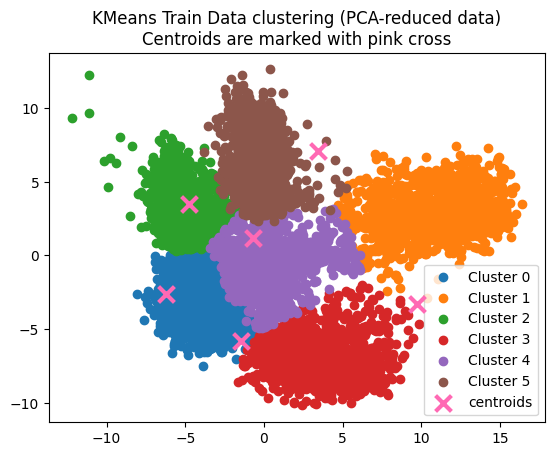

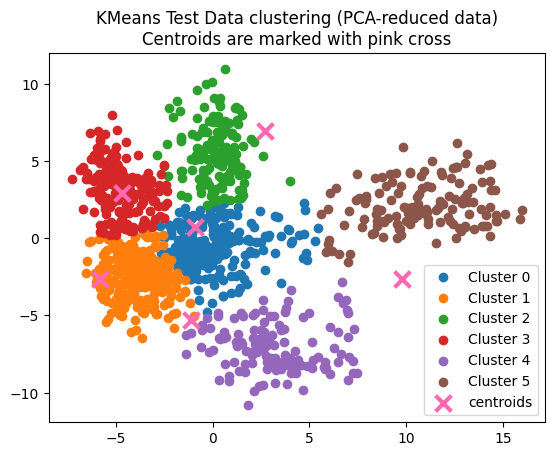

In [121]:
plot_cluster(X_train,kmeans_model.predict(X_train),"KMeans Train Data",model=kmeans_model)
plot_cluster(X_test,kmeans_model.fit(X_test).predict(X_test),"KMeans Test Data",model=kmeans_model)

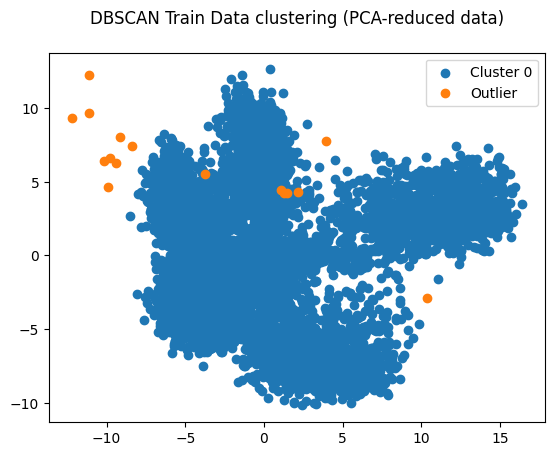

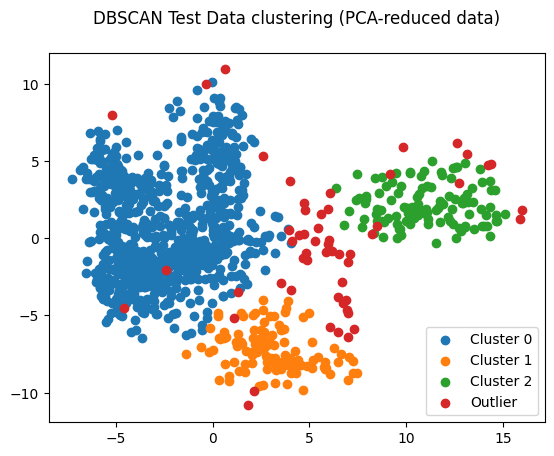

In [122]:
plot_cluster(X_train,dbscan_model.fit_predict(X_train),"DBSCAN Train Data")
plot_cluster(X_test,dbscan_model.fit_predict(X_test),"DBSCAN Test Data")

As we can see the Kmeans did a pretty good job but in spaces that the data is so dense it has some confusions detecting the cluster.

For DBSCAN as we can see for the case of training data which is pretty dense the algorithm fails to deliver and the clustering is not good but in the case of test data as we reduse the density by decreasing the data the clustering did a good job partitioning each dense space.

## Evaluation and Analysis

### Q8.

1. **Homogeneity Score**:
The homogeneity score measures the extent to which each cluster contains only samples belonging to a single class or category. It assesses whether the clusters align well with the ground truth labels. The score ranges from 0 to 1.

This is how it works:

- For each cluster, the distribution of class labels within that cluster is computed.

- The most frequent class label in each cluster is identified.

- The homogeneity score is calculated by averaging the ratio of the number of samples belonging to the most frequent class label in each cluster to the total number of samples in that cluster.


$$H = \frac{1}{N} \sum \left(\frac{{\max(\text{{class\_count}})}}{{N_{\text{{cluster}}}}}\right)$$

where N is the total number of samples, N_cluster is the number of samples in the cluster, and max(class_count) is the count of the most frequent class label within the cluster.

2. **Silhouette Score**:
The silhouette score measures how well each sample fits into its assigned cluster and how distinct it is from samples in neighboring clusters. It provides an indication of the compactness and separation between clusters. The silhouette score ranges from -1 to 1.

This is how it works:

- For a given sample the average distance between that sample and all other samples within the same cluster is computed. This is known as the `intra-cluster distance` ($a$).

- The average distance between that sample and all samples in the nearest neighboring cluster is calculated. This is known as the `inter-cluster distance` ($b$).

- The silhouette score for the sample is computed using the formula:

$$\text{{silhouette\_score}} = \frac{{b - a}}{{\max(a, b)}}$$

- Steps 1-3 are repeated for each sample, and the average silhouette score across all samples is calculated to obtain the overall silhouette score for the clustering result.


In [123]:
y_pred = kmeans_model.fit(X_test).predict(X_test)
H = homogeneity_score(y_test, y_pred)
S = silhouette_score(X_test, y_pred)

print("Test Data")
print("Model             : KMeans")
print(f"Homogeneity Score : {H:.4f}")
print(f"Silhouette Score  : {S:.4f}")
print("--------------------------------------------")

y_pred = kmeans_model.fit(X_train).predict(X_train)
H = homogeneity_score(y_train, y_pred)
S = silhouette_score(X_train, y_pred)

print("Train Data")
print("Model             : KMeans")
print(f"Homogeneity Score : {H:.4f}")
print(f"Silhouette Score  : {S:.4f}")
print("--------------------------------------------")

Test Data
Model             : KMeans
Homogeneity Score : 0.5927
Silhouette Score  : 0.4368
--------------------------------------------
Train Data
Model             : KMeans
Homogeneity Score : 0.6424
Silhouette Score  : 0.4641
--------------------------------------------


In [124]:
y_pred = dbscan_model.fit_predict(X_test)
H = homogeneity_score(y_test, y_pred)
S = silhouette_score(X_test, y_pred)

print("Test Data")
print("Model             : DBSCAN")
print(f"Homogeneity Score : {H:.4f}")
print(f"Silhouette Score  : {S:.4f}")
print("--------------------------------------------")

y_pred = dbscan_model.fit_predict(X_train)
H = homogeneity_score(y_train, y_pred)
S = silhouette_score(X_train, y_pred)

print("Train Data")
print("Model             : DBSCAN")
print(f"Homogeneity Score : {H:.4f}")
print(f"Silhouette Score  : {S:.4f}")
print("--------------------------------------------")

Test Data
Model             : DBSCAN
Homogeneity Score : 0.2948
Silhouette Score  : 0.3848
--------------------------------------------
Train Data
Model             : DBSCAN
Homogeneity Score : 0.0007
Silhouette Score  : 0.2927
--------------------------------------------


### Q6. 
AS we can see the KMeans performs better in clustering than DBSCAN.
KMeans algorithm according to the higher Homogeneity Score criterion, has performed better in clustering. Also having a higher Silhouette Score shows that it has produced clusters with better intra-cluster and inter-cluster discriminability.

Here are some of the reasons why :

- Each of these two algorithms performs well in different situations. KMeans is suitable where spherical clustering is desirable but DBSCAN can find more complex and non-standard clusters. So here the KMeans performs better as the nature of our problem requires more simple clusters.
- The other important factor here is that our data distribution is pretty dense in some areas making it difficult for the DBSCAN to cluster the data properly.
- The other factor that worth mentioning is that while the feature extraction step happens some text may be assigned values that causes the data to be sparsed result in a situation that DBSCAN predict them as outliers.

### Q10.

1. `Larger Dataset`: Our corpus does not seem to be sufficiently large, resulting in the doc2vec model’s inability to extract satisfactory features. To improve the performance of our model, it may be necessary to procure a larger training dataset.

2. `Feature Selection/Extraction`: Reducing the dimensionality of data can improve the speed and potentially the accuracy of models. Techniques such as PCA can be used.

3. `Algorithm Modification`: There are improved versions of these algorithms that can be considered. For instance, an improved DBSCAN algorithm called K-DBSCAN applies an initial grouping to the data through the K-means++ algorithm, then employs DBSCAN to perform clustering in each group separately.

4. `Optimization Algorithms`: We can use optimization algorithms to improve the parameters of DBSCAN. For example, an efficient DBSCAN optimized by arithmetic optimization algorithm (OBLAOA-DBSCAN) can provide highly accurate clusters more efficiently.

5. `Using more Optimized Word feature extraction` 

# Conclusion
In conclusion, using k-means and DBSCAN algorithms in a news clustering project allows for efficient organization and analysis of news articles based on their content. These algorithms can group similar articles together, enabling the discovery of topics and patterns within the news corpus. By representing articles as feature vectors, important information can be captured and used for clustering. Overall, this approach enhances news exploration and understanding.